Explore the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4866 entries, 0 to 4865
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             4866 non-null   int64 
 1   Month            4866 non-null   object
 2   Week             4866 non-null   int64 
 3   Division         4866 non-null   object
 4   District         4866 non-null   object
 5   Upazila          4866 non-null   object
 6   Market Name      4866 non-null   object
 7   Commodity Group  4866 non-null   object
 8   Commodity Name   4866 non-null   object
 9   Retail Unit      4866 non-null   object
 10  Retail Price     4866 non-null   object
 11  R Average Price  4866 non-null   object
 12  Whole Sale Unit  4866 non-null   object
 13  Wholesale price  4866 non-null   object
 14  W Average Price  4866 non-null   object
dtypes: int64(2), object(13)
memory usage: 570.4+ KB


<Axes: >

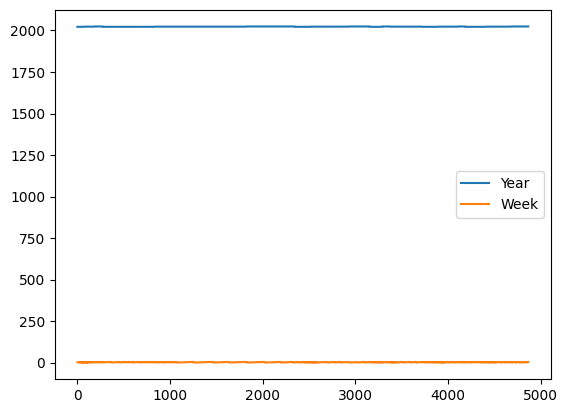

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/FYDP /Dataset/C Dataset -.csv')
df.info()

df.plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_numeric = df.select_dtypes(include='number')
print(df_numeric.columns)

Index(['Year', 'Week'], dtype='object')


<Axes: >

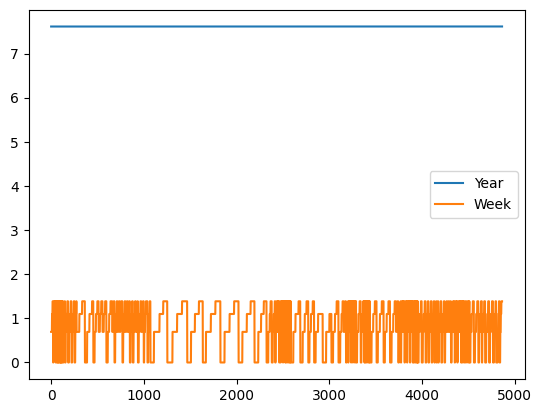

In [ ]:
import numpy as np
import pandas as pd


df_numeric = df.select_dtypes(include=['number'])
df_log = np.log(df_numeric)

df_log.plot()

In [ ]:
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

Check for stationarity of time series

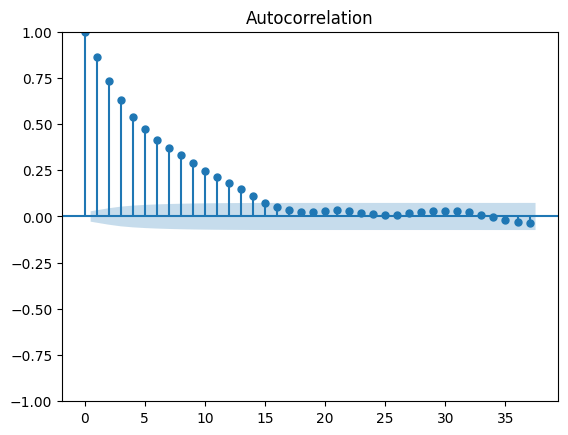

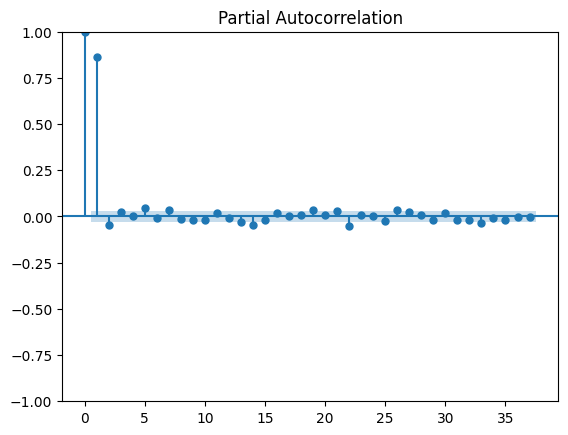

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_train_numeric = df_train.select_dtypes(include='number')

chosen_column = 'Week'
acf_original = plot_acf(df_train_numeric[chosen_column])

pacf_original = plot_pacf(df_train_numeric[chosen_column])

ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller

df_train_numeric = df_train.select_dtypes(include='number')

chosen_column = 'Week'
adf_test = adfuller(df_train_numeric[chosen_column])

print(f'p-value: {adf_test[1]}')

p-value: 3.6052706467973637e-19


Transform to stationary: differencing

<Axes: >

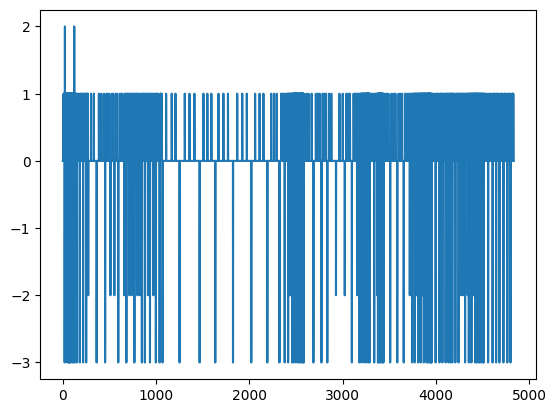

In [ ]:
# Convert the 'Week' column to numeric, handling non-numeric values by setting them to NaN
df_train['Week'] = pd.to_numeric(df_train['Week'], errors='coerce')

# Calculate the difference between consecutive rows, handling missing values
df_train_diff = df_train['Week'].diff().dropna() # calculate difference on the 'Week' column only

# Plot the differenced data
df_train_diff.plot()

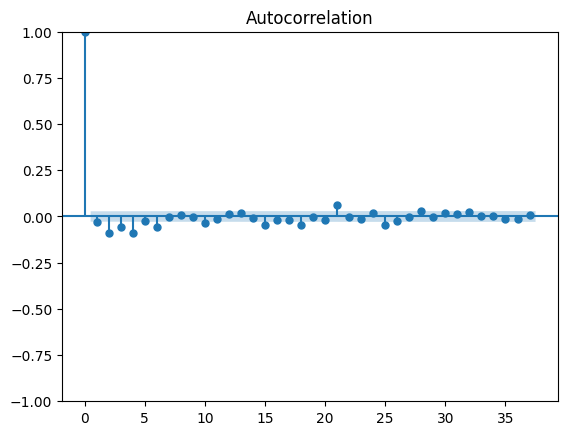

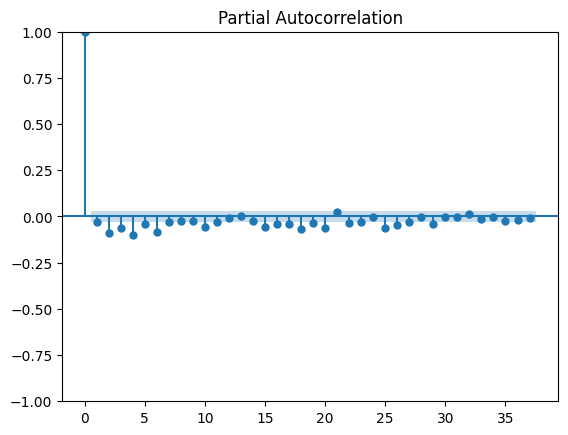

In [ ]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [ ]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


Determine ARIMA models parameters p, q

Converted column 'Month' to numeric.
Converted column 'Division' to numeric.
Converted column 'District' to numeric.
Converted column 'Upazila' to numeric.
Converted column 'Market Name' to numeric.
Converted column 'Commodity Group' to numeric.
Converted column 'Commodity Name' to numeric.
Converted column 'Retail Unit' to numeric.
Converted column 'Retail Price' to numeric.
Converted column 'R Average Price' to numeric.
Converted column 'Whole Sale Unit' to numeric.
Converted column 'Wholesale price' to numeric.
Converted column 'W Average Price' to numeric.
                               SARIMAX Results                                
Dep. Variable:                   Week   No. Observations:                 4836
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4069.873
Date:                Tue, 13 Aug 2024   AIC                           8145.747
Time:                        14:41:39   BIC                           8165.198
Sample:                             0 

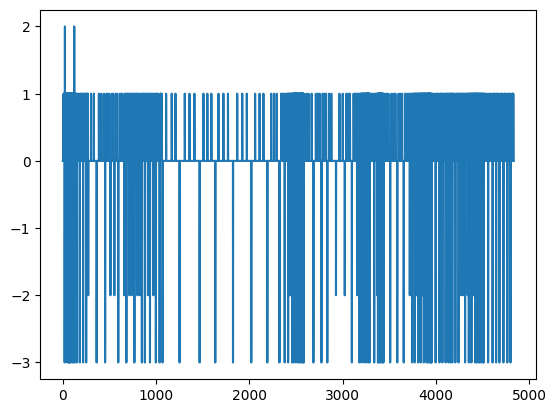

In [ ]:
df_train['Week'] = pd.to_numeric(df_train['Week'], errors='coerce')


for col in df_train.columns:
    if df_train[col].dtype == 'object':
        try:
            df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
            print(f"Converted column '{col}' to numeric.")
        except:
            print(f"Column '{col}' could not be converted to numeric. Consider handling it appropriately.")

df_train_diff = df_train['Week'].diff().dropna()

df_train_diff.plot()

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train['Week'], order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

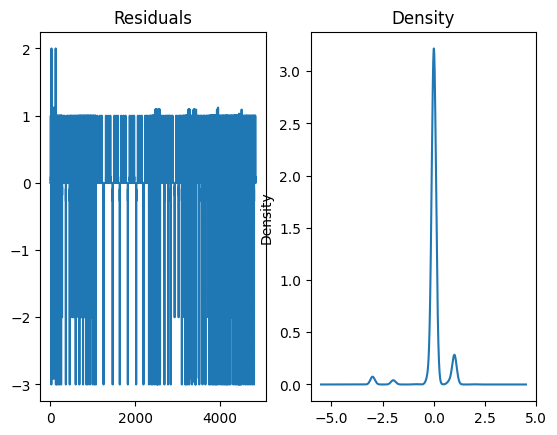

In [ ]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

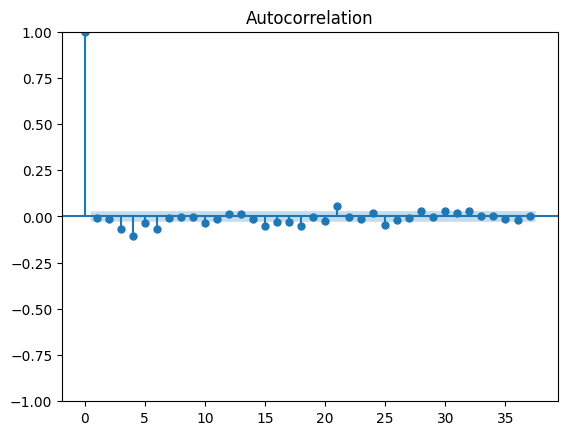

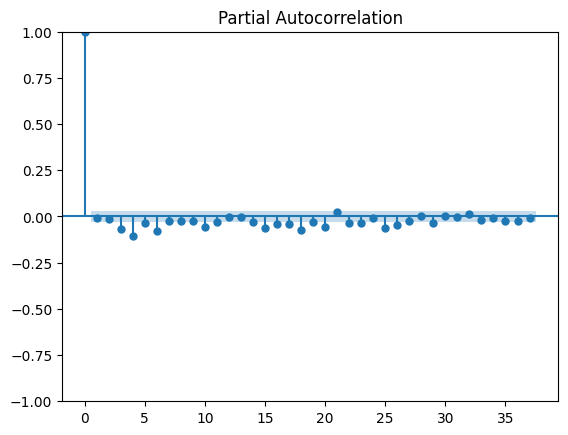

In [ ]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

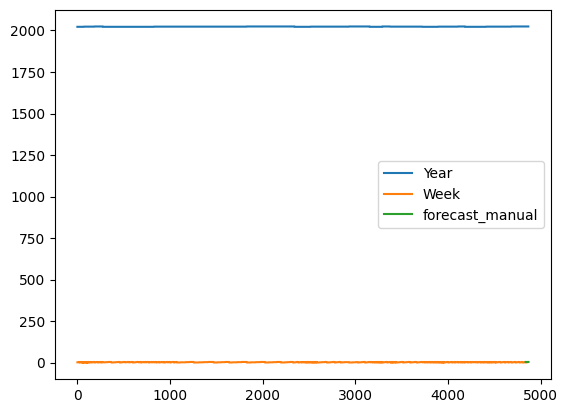

In [ ]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

Auto-fit the ARIMA model


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.7 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

auto_arima = pm.auto_arima(df_train['Week'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:

auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4836
Model:               SARIMAX(1, 0, 4)   Log Likelihood               -4005.903
Date:                Tue, 13 Aug 2024   AIC                           8023.805
Time:                        14:46:48   BIC                           8062.709
Sample:                             0   HQIC                          8037.463
                               - 4836                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9920      0.003    376.563      0.000       0.987       0.997
ma.L1         -0.0543      0.024     -2.251      0.024      -0.102      -0.007
ma.L2         -0.1255      0.015     -8.469      0.000      -0.155      -0.096
ma.L3         -0.0844      0.014     -5.911      0.000      -0.112      -0.056
ma.L4         -0.1123      0.012     -9.246      0.000      -0.136      -0.089
sigma2         0.3067      0.004     73.667      0.000       0.299       0.315
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             53408.67
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                            -2.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

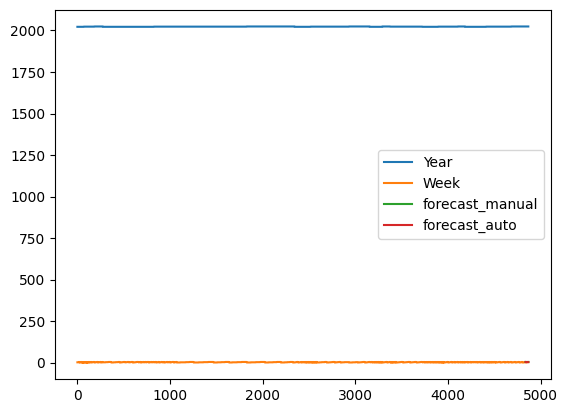

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

In [ ]:
df_test['Week'] = pd.to_numeric(df_test['Week'], errors='coerce')

mae = mean_absolute_error(df_test['Week'], forecast_test)
mape = mean_absolute_percentage_error(df_test['Week'], forecast_test)
rmse = np.sqrt(mean_squared_error(df_test['Week'], forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 1.3
mape - manual: 0.9666666666666667
rmse - manual: 1.760681686165901


In [ ]:
df_test['Week'] = pd.to_numeric(df_test['Week'], errors='coerce')

mae = mean_absolute_error(df_test['Week'], forecast_test_auto)
mape = mean_absolute_percentage_error(df_test['Week'], forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test['Week'], forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 1.2457589032057832
mape - auto: 0.8518715925779042
rmse - auto: 1.5230485126577538


In [ ]:
p, d, q = model.order
print(f"p: {p}")
print(f"d: {d}")
print(f"q: {q}")

p: 2
d: 1
q: 0


In [ ]:
p, d, q = auto_arima.order
print(f"p: {p}")
print(f"d: {d}")
print(f"q: {q}")

p: 1
d: 0
q: 4
